# BAM

Weight Matrix W:
 [[ 0  0  0  0  0 -2  0 -2 -2  0  0 -2  0  2  0]
 [ 2  2  2  2 -2  0  2  0  0  2 -2  0  2  0  2]]


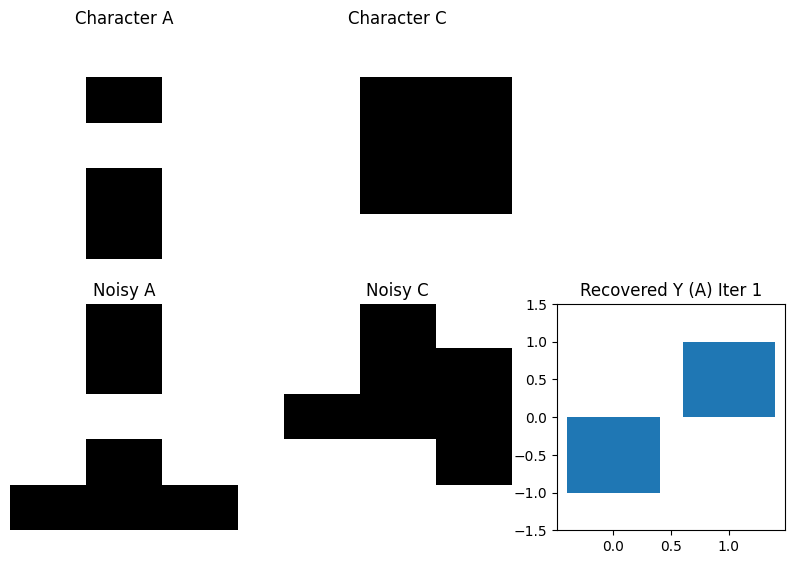

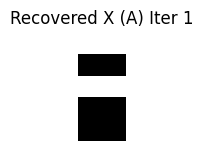

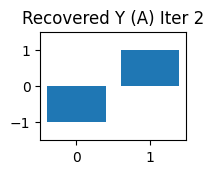

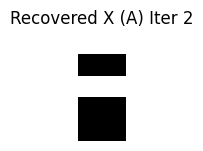

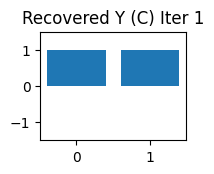

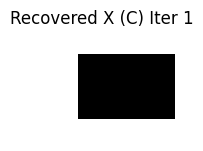

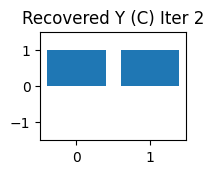

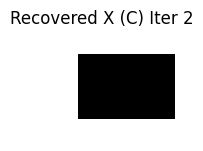

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize characters
def visualize_character(char_pattern, title_text, subplot_index):
    plt.subplot(3, 3, subplot_index)
    plt.imshow(char_pattern.reshape(5, 3), cmap="gray", aspect="auto")
    plt.axis("off")
    plt.title(title_text)

# Define 5x3 grid representations of characters A and C in bipolar form
A = np.array([
    [1,  1,  1],
    [1, -1,  1],
    [1,  1,  1],
    [1, -1,  1],
    [1, -1,  1]
])
C = np.array([
    [1,  1,  1],
    [1, -1, -1],
    [1, -1, -1],
    [1, -1, -1],
    [1,  1,  1]
])

# Flatten patterns into column vectors
X = np.column_stack([A.flatten(), C.flatten()])
T = np.array([[-1, 1], [1, 1]])  # New target associations for A and C

# Compute weight matrix using Hebbian learning
W = np.dot(T, X.T)
print("Weight Matrix W:\n", W)

# Create noisy inputs
noise_level = 3  # Number of pixels to flip
X_noisy = X.copy()
for i in range(X.shape[1]):
    noise_idx = np.random.choice(X.shape[0], noise_level, replace=False)
    X_noisy[noise_idx, i] *= -1  # Flip pixels

# Plot original characters
plt.figure(figsize=(10, 10))
visualize_character(A.flatten(), "Character A", 1)
visualize_character(C.flatten(), "Character C", 2)

# Plot noisy characters
visualize_character(X_noisy[:, 0], "Noisy A", 4)
visualize_character(X_noisy[:, 1], "Noisy C", 5)

# BAM retrieval with bidirectional recall
for i in range(X_noisy.shape[1]):
    X_curr = X_noisy[:, i]
    iteration = 0
    while True:
        iteration += 1
        # Forward step: X -> Y
        Y = np.sign(np.dot(W, X_curr))
        
        if i == 0:
            plt.subplot(3, 3, 6)
            plt.bar(range(len(Y)), Y)
            plt.ylim([-1.5, 1.5])
            plt.title(f"Recovered Y (A) Iter {iteration}")
        else:
            plt.subplot(3, 3, 9)
            plt.bar(range(len(Y)), Y)
            plt.ylim([-1.5, 1.5])
            plt.title(f"Recovered Y (C) Iter {iteration}")
        
        plt.pause(1)
        
        # Backward step: Y -> X
        X_new = np.sign(np.dot(W.T, Y))
        
        if i == 0:
            visualize_character(X_new, f"Recovered X (A) Iter {iteration}", 7)
        else:
            visualize_character(X_new, f"Recovered X (C) Iter {iteration}", 8)
        
        plt.pause(1)
        
        # Check for convergence
        if np.array_equal(X_new, X_curr):
            break
        
        X_curr = X_new  # Update X for next iteration

plt.show()
